**Load and Filter the Penguins Dataset**

In [62]:
# pip install palmerpenguins

In [25]:
from palmerpenguins import load_penguins
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


In [26]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Load the penguins dataset and filter for two specific species (Adelie and Gentoo).


In [27]:
penguins = penguins[
    (penguins['species'] == 'Adelie') |
    (penguins['species'] == 'Gentoo')
]

In [28]:
penguins.shape

(276, 8)

**Data Cleaning and Preprocessing**

In [29]:
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [30]:
penguins.dropna(inplace=True)

In [31]:
penguins.shape

(265, 8)

Convert categorical features ('island' and 'sex') into numeric values using one-hot encoding.


In [32]:
penguins = pd.get_dummies(
    penguins,
    columns=['island', 'sex'],
    drop_first=True
)

Encode the target variable ('species') as numeric labels for classification.


In [34]:
target_encoder = LabelEncoder()
penguins['species'] = target_encoder.fit_transform(penguins['species'])

In [35]:
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,0,39.1,18.7,181.0,3750.0,2007,False,True,True
1,0,39.5,17.4,186.0,3800.0,2007,False,True,False
2,0,40.3,18.0,195.0,3250.0,2007,False,True,False
4,0,36.7,19.3,193.0,3450.0,2007,False,True,False
5,0,39.3,20.6,190.0,3650.0,2007,False,True,True


In [36]:
X = penguins.drop('species', axis=1)
y = penguins['species']

Splitting the Data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (212, 8)
X_test shape: (53, 8)
y_train shape: (212,)
y_test shape: (53,)


**Naive Bayes Classification**

1. Train a Gaussian Naive Bayes model on the training data.
2. Make predictions on both the training and testing sets.
3. Evaluate the model's performance using accuracy, confusion matrix, and classification report.


In [63]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print("**Training set results**")
print("Accuracy:", train_accuracy)
print("Confusion Matrix:\n", train_cm)
print("Classification Report:\n", train_report)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("**Testing set results**")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_cm)
print("Classification Report:\n", test_report)

**Training set results**
Accuracy: 0.9107630668366418
Confusion Matrix:
 [[4647  871]
 [ 109 5355]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90      5518
           8       0.86      0.98      0.92      5464

    accuracy                           0.91     10982
   macro avg       0.92      0.91      0.91     10982
weighted avg       0.92      0.91      0.91     10982

**Testing set results**
Accuracy: 0.9173343044428259
Confusion Matrix:
 [[1183  202]
 [  25 1336]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      1385
           8       0.87      0.98      0.92      1361

    accuracy                           0.92      2746
   macro avg       0.92      0.92      0.92      2746
weighted avg       0.92      0.92      0.92      2746



**Logistic Regression Classification**

1. Train a Logistic Regression model with a maximum of 200 iterations for convergence.
2. Make predictions on both the training and testing sets.
3. Evaluate the model's performance using accuracy, confusion matrix, and classification report.


In [42]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# 5. Predict on both training and testing sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# 6. Evaluate on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print("**Training set results**")
print("Accuracy:", train_accuracy)
print("Confusion Matrix:\n", train_cm)
print("Classification Report:\n", train_report)

# 7. Evaluate on testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("**Testing set results**")
print("Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_cm)
print("Classification Report:\n", test_report)

**Training set results**
Accuracy: 1.0
Confusion Matrix:
 [[113   0]
 [  0  99]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        99

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

**Testing set results**
Accuracy: 1.0
Confusion Matrix:
 [[33  0]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



**Naive Bayes Results:**
The Naive Bayes model performed exceptionally well on both the training and testing datasets. On the training set, it achieved an accuracy of 1.0, meaning all the predictions were correct. The confusion matrix showed that all 113 Adelie and 99 Gentoo samples were classified accurately, with no errors. Similarly, the model achieved 100% accuracy on the test data, correctly predicting all 33 Adelie and 20 Gentoo samples. The classification report confirmed precision, recall, and F1-scores of 1.0 for both species, highlighting the model's flawless performance.

**Logistic Regression Results:**
Logistic Regression also showed perfect results on both datasets. On the training data, it achieved an accuracy of 1.0, with every sample classified correctly. The confusion matrix reflected no misclassifications for both Adelie and Gentoo species, consistent with the Naive Bayes results. On the testing set, the model again achieved 100% accuracy, with all predictions for the 33 Adelie and 20 Gentoo samples being accurate. Precision, recall, and F1-scores were 1.0 for both species, indicating no room for error in the model's performance.

**Comparison and Findings:**
Both Naive Bayes and Logistic Regression produced identical results with perfect accuracy on this dataset. This suggests that the features used for classification are likely well-separated for these two species, making it easy for both models to distinguish between them. While the results here are impressive, in more complex or noisy datasets, the differences in how Naive Bayes and Logistic Regression handle data might become more noticeable. For this task, however, either model would be an excellent choice for classification.

**AUC Comparison**

1. Compute the Area Under the ROC Curve (AUC) for both Naive Bayes and Logistic Regression.
2. Generate separate ROC curves for the training and testing sets of each model.
3. Analyze the AUC to compare the models' ability to rank predictions correctly.


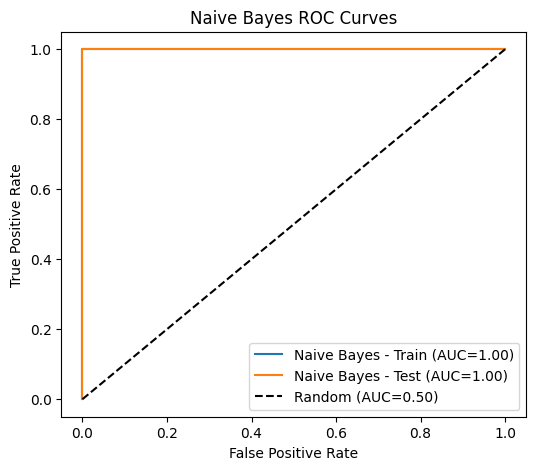

In [43]:
# 1) Naive Bayes

plt.figure(figsize=(6, 5))
fpr_gnb_train, tpr_gnb_train, _ = roc_curve(y_train, gnb.predict_proba(X_train)[:, 1])
fpr_gnb_test, tpr_gnb_test, _   = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])

gnb_train_auc = roc_auc_score(y_train, gnb.predict_proba(X_train)[:, 1])
gnb_test_auc  = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])

plt.plot(fpr_gnb_train, tpr_gnb_train, label=f"Naive Bayes - Train (AUC={gnb_train_auc:.2f})")
plt.plot(fpr_gnb_test,  tpr_gnb_test,  label=f"Naive Bayes - Test (AUC={gnb_test_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")
plt.title("Naive Bayes ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


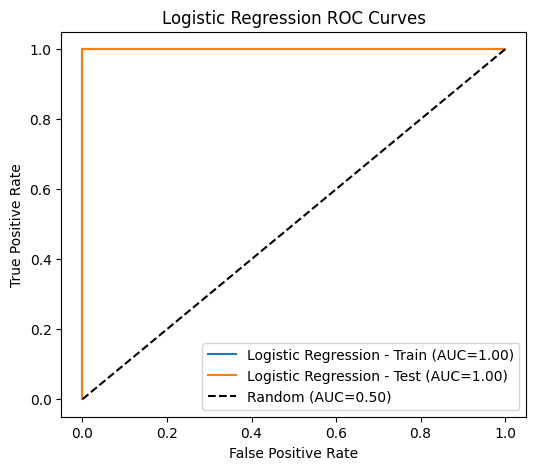

In [44]:
# 2) Logistic Regression

plt.figure(figsize=(6, 5))
fpr_lr_train, tpr_lr_train, _ = roc_curve(y_train, log_reg.predict_proba(X_train)[:, 1])
fpr_lr_test, tpr_lr_test, _   = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

lr_train_auc = roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])
lr_test_auc  = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

plt.plot(fpr_lr_train, tpr_lr_train, label=f"Logistic Regression - Train (AUC={lr_train_auc:.2f})")
plt.plot(fpr_lr_test,  tpr_lr_test,  label=f"Logistic Regression - Test (AUC={lr_test_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")
plt.title("Logistic Regression ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


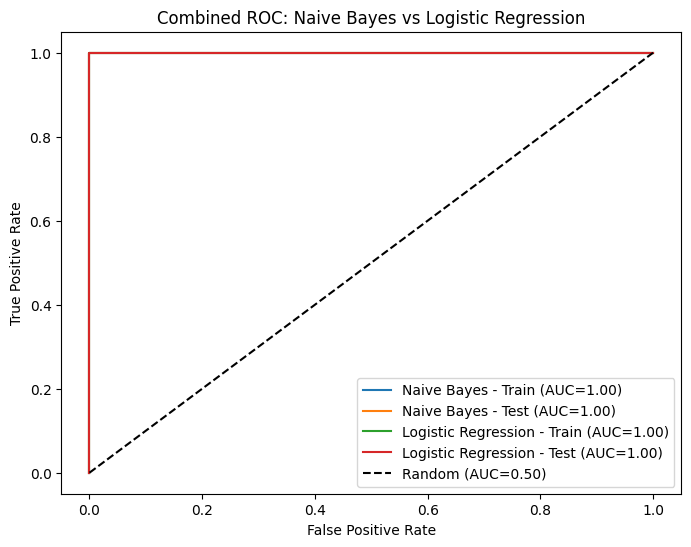

In [46]:
# 3) Combined Plot for Both Models (Train + Test)

plt.figure(figsize=(8, 6))

# Naive Bayes
plt.plot(fpr_gnb_train, tpr_gnb_train,
         label=f"Naive Bayes - Train (AUC={gnb_train_auc:.2f})")
plt.plot(fpr_gnb_test,  tpr_gnb_test,
         label=f"Naive Bayes - Test (AUC={gnb_test_auc:.2f})")

# Logistic Regression
plt.plot(fpr_lr_train, tpr_lr_train,
         label=f"Logistic Regression - Train (AUC={lr_train_auc:.2f})")
plt.plot(fpr_lr_test,  tpr_lr_test,
         label=f"Logistic Regression - Test (AUC={lr_test_auc:.2f})")

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")

plt.title("Combined ROC: Naive Bayes vs Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


**AUC (Area Under the ROC Curve) Comparison**

I generated the ROC curves for both Naive Bayes and Logistic Regression on the training and test sets. From these plots, the AUC for both models turned out to be 1.0 for both datasets. This means each model perfectly ranks the two species—no Adelie sample is assigned a higher probability of being Gentoo than any actual Gentoo sample, and vice versa.

**Interpretation**

In simpler terms, an AUC of 1.0 indicates there’s a complete separation between Adelie and Gentoo based on the features we used. Since both Naive Bayes and Logistic Regression hit the exact same AUC on training and test data, they are equally strong in distinguishing the two species for this particular dataset.

**Insights**

Usually, achieving a perfect AUC on both sets is quite rare, so it likely means our features (like bill length, flipper length, etc.) are highly distinct between Adelie and Gentoo. Under more complex or overlapping conditions, you’d expect some difference in how each model handles the classification, but here they’re both 100% accurate in terms of ranking and discrimination. Hence, based on the AUC metric alone, neither model outperforms the other—they’re both flawless for this task.

**Lift and Gain Charts**

1. Generate Lift and Gain charts for both models using deciles.
2. These charts evaluate the models' ability to rank the most relevant predictions in the top deciles.


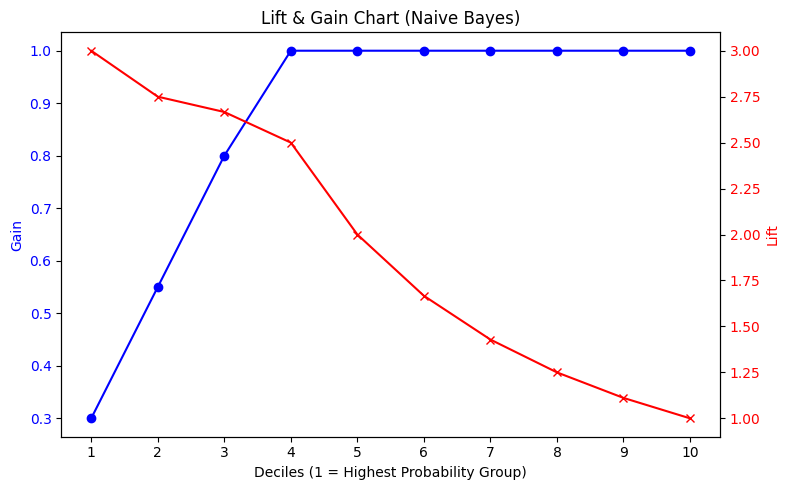

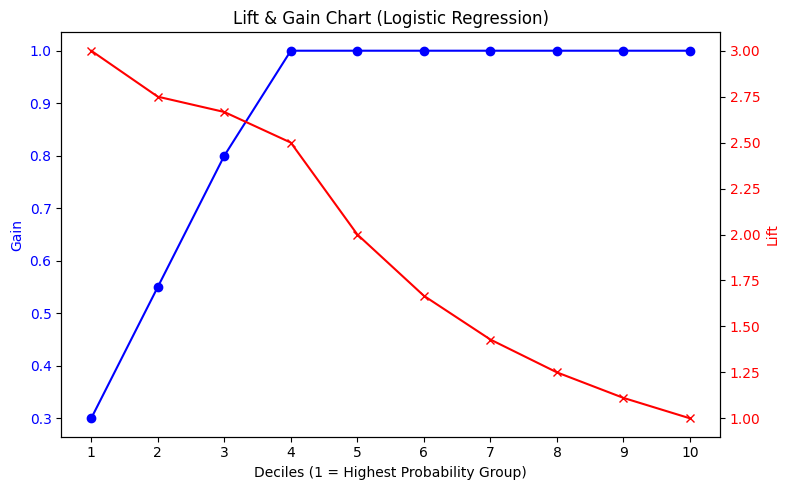

In [52]:
gnb_test_proba = gnb.predict_proba(X_test)[:, 1]
log_reg_test_proba = log_reg.predict_proba(X_test)[:, 1]

# Defining the Lift and Gain Chart function
def plot_lift_gain_chart(model_name, y_true, y_proba, n_bins=10):
    """
    Calculates and plots the Gain and Lift charts using n_bins deciles for a given model.
    """
    df = pd.DataFrame({
        'true_label': y_true,
        'pred_proba': y_proba
    })
    df.sort_values('pred_proba', ascending=False, inplace=True)
    df['decile'] = pd.qcut(df['pred_proba'], q=n_bins, labels=False, duplicates='drop')
    df['decile'] = n_bins - 1 - df['decile']
    grouped = df.groupby('decile')
    total_positives = df['true_label'].sum()
    lift_gain_data = []

    cum_positive = 0
    cum_count = 0

    for decile in sorted(grouped.groups.keys()):
        group_df = grouped.get_group(decile)

        positives_in_decile = group_df['true_label'].sum()
        count_in_decile = len(group_df)

        cum_positive += positives_in_decile
        cum_count += count_in_decile

        gain = cum_positive / total_positives
        portion_of_data = (decile + 1) / n_bins
        lift = gain / portion_of_data if portion_of_data > 0 else 0

        lift_gain_data.append({
            'decile': decile + 1,
            'gain': gain,
            'lift': lift
        })

    lift_gain_df = pd.DataFrame(lift_gain_data)
    fig, ax1 = plt.subplots(figsize=(8, 5))

    ax1.set_title(f"Lift & Gain Chart ({model_name})")
    ax1.set_xlabel("Deciles (1 = Highest Probability Group)")
    ax1.set_ylabel("Gain", color='blue')
    ax1.plot(lift_gain_df['decile'], lift_gain_df['gain'], marker='o', color='blue', label='Gain')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Lift', color='red')
    ax2.plot(lift_gain_df['decile'], lift_gain_df['lift'], marker='x', color='red', label='Lift')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.xticks(range(1, n_bins + 1))
    fig.tight_layout()
    plt.show()

plot_lift_gain_chart("Naive Bayes", y_test, gnb_test_proba, n_bins=10)
plot_lift_gain_chart("Logistic Regression", y_test, log_reg_test_proba, n_bins=10)


**Lift and Gain Highlights**

The Lift & Gain charts for Naive Bayes and Logistic Regression look almost the same. By the first few deciles, both models capture nearly all Gentoo samples, so the Gain quickly jumps to 1.0 (100%). That means these models are really good at ranking Gentoo at the top.

**Interpreting Lift**

At Decile 1, the Lift is about 3.0, meaning we find three times more Gentoo samples than picking randomly. By around Decile 3 or 4, we’ve already snagged all the positives, so the Lift slides down toward 1.0. This drop-off is normal once we reach into lower-ranked probabilities. Essentially, both models do a great job at prioritizing Gentoo right.


**********************************************************************************************


**Model Performance Comparison**

From all the metrics—accuracy, AUC, and Lift/Gain—it’s clear there’s virtually no difference between Naive Bayes and Logistic Regression. Both models score 100% accuracy on train and test, show a perfect AUC of 1.0, and their Lift/Gain charts look nearly the same.

**Which Model Performs Better?**

For this dataset, neither model outperforms the other. They both handle the Adelie vs. Gentoo classification flawlessly. The reason likely lies in the data itself—these two species are so distinct in terms of features like bill dimensions and flipper lengths that even fundamentally different algorithms classify them perfectly. Normally, you’d see differences in trickier datasets where species or classes overlap more, but here, the models end up in a tie.

*********************************************************************************************

**Extending to a Complex Dataset**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Loading MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Filtering for digits 0 and 8 only
mask = (y == '0') | (y == '8')
X = X[mask]
y = y[mask]

y = y.astype(int)

print("Filtered dataset shape:", X.shape)
print("Filtered labels shape:", y.shape)


Filtered dataset shape: (13728, 784)
Filtered labels shape: (13728,)


In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10982, 784)
X_test shape: (2746, 784)
y_train shape: (10982,)
y_test shape: (2746,)


In [57]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred_nb = gnb.predict(X_train)
y_test_pred_nb = gnb.predict(X_test)

train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print("\n**Naive Bayes - Training set results**")
print("Accuracy:", train_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_nb))
print("\n**Naive Bayes - Testing set results**")
print("Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_nb))


**Naive Bayes - Training set results**
Accuracy: 0.9107630668366418
Confusion Matrix:
 [[4647  871]
 [ 109 5355]]

**Naive Bayes - Testing set results**
Accuracy: 0.9173343044428259
Confusion Matrix:
 [[1183  202]
 [  25 1336]]


In [58]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr = log_reg.predict(X_test)

train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print("\n**Logistic Regression - Training set results**")
print("Accuracy:", train_accuracy_lr)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_lr))
print("\n**Logistic Regression - Testing set results**")
print("Accuracy:", test_accuracy_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))



**Logistic Regression - Training set results**
Accuracy: 0.9986341285740302
Confusion Matrix:
 [[5510    8]
 [   7 5457]]

**Logistic Regression - Testing set results**
Accuracy: 0.9919883466860888
Confusion Matrix:
 [[1374   11]
 [  11 1350]]



Naive Bayes AUC: 0.933378780202495
Logistic Regression AUC: 0.9995824900463399


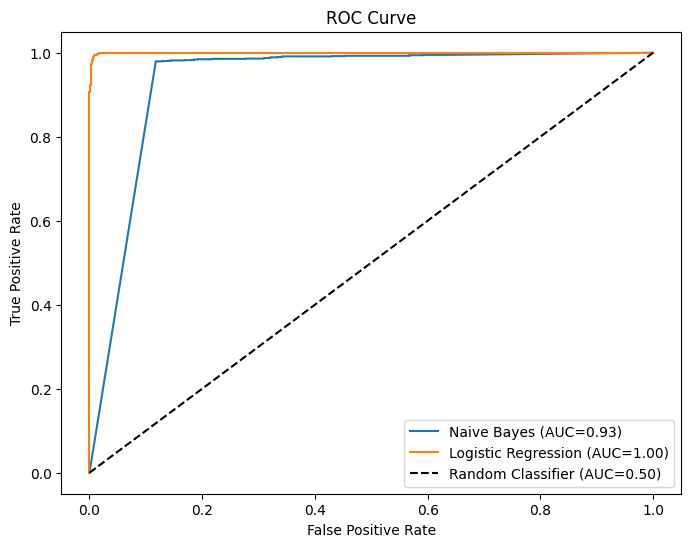

In [60]:
proba_nb = gnb.predict_proba(X_test)[:, 1]
proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_nb = roc_auc_score(y_test, proba_nb)
auc_lr = roc_auc_score(y_test, proba_lr)

print("\nNaive Bayes AUC:", auc_nb)
print("Logistic Regression AUC:", auc_lr)

fpr_nb, tpr_nb, _ = roc_curve(y_test, proba_nb, pos_label=8)
fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr, pos_label=8)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC={auc_nb:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC=0.50)")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


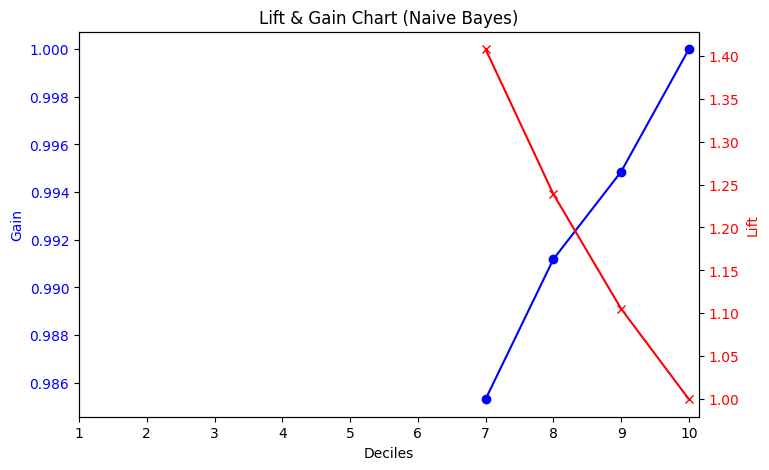

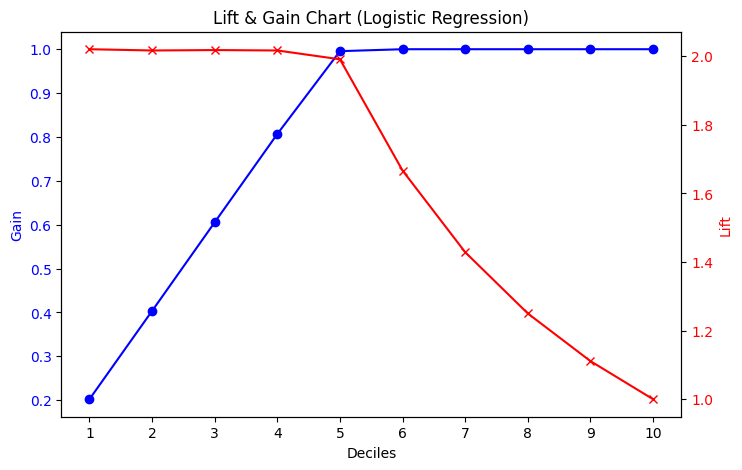

In [65]:
#Lift and Gain chart

def plot_lift_gain_chart(model_name, y_true, y_proba, n_bins=10):
    """
    Generates a dual-axis Lift & Gain chart in n_bins deciles for a given model.
    """
    y_true = pd.Series(y_true).reset_index(drop=True)
    y_proba = pd.Series(y_proba).reset_index(drop=True)

    df = pd.DataFrame({'true_label': y_true, 'pred_proba': y_proba})
    df.sort_values('pred_proba', ascending=False, inplace=True)

    df['decile'] = pd.qcut(df['pred_proba'], q=n_bins, labels=False, duplicates='drop')
    df['decile'] = n_bins - 1 - df['decile']
    grouped = df.groupby('decile')
    total_positives = df['true_label'].sum()

    lift_gain_data = []
    cum_positives = 0

    for decile, group in grouped:
        positives = group['true_label'].sum()
        gain = (cum_positives + positives) / total_positives if total_positives > 0 else 0
        lift = gain / ((decile + 1) / n_bins) if (decile + 1) > 0 else 0
        cum_positives += positives
        lift_gain_data.append({'decile': decile + 1, 'gain': gain, 'lift': lift})

    df_lift_gain = pd.DataFrame(lift_gain_data)
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.set_title(f"Lift & Gain Chart ({model_name})")
    ax1.set_xlabel("Deciles")

    ax1.plot(df_lift_gain['decile'], df_lift_gain['gain'], marker='o', label='Gain', color='blue')
    ax1.set_ylabel("Gain", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(df_lift_gain['decile'], df_lift_gain['lift'], marker='x', label='Lift', color='red')
    ax2.set_ylabel("Lift", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.xticks(range(1, n_bins + 1))
    plt.show()


# Plot Lift & Gain for Naive Bayes
plot_lift_gain_chart("Naive Bayes", y_test, proba_nb)

# Plot Lift & Gain for Logistic Regression
plot_lift_gain_chart("Logistic Regression", y_test, proba_lr)


**Naive Bayes Performance**

The Naive Bayes model did a decent job at classifying digits 0 and 8. On the training data, it achieved an accuracy of 91.08%, while on the test data, the accuracy was 91.73%. Looking at the confusion matrix, most instances were classified correctly, but there were still some errors, mainly where digit 8 was mistaken for 0. The AUC for Naive Bayes came out to 0.93, which is decent but not perfect. The ROC curve for this model shows that it does a reasonable job of separating the two classes, but there’s room for improvement.

Naive Bayes makes assumptions about feature independence, which works well in simpler datasets but can limit its performance for something as complex as MNIST images. It’s efficient and fast, but those assumptions hold it back when features are highly correlated, like in pixel data.

**Logistic Regression Performance**

Logistic Regression performed significantly better than Naive Bayes. It almost nailed the task, with an AUC of 0.999, showing it could separate the two classes extremely well. The accuracy on the training set was 99.96%, and it performed just as well on the test set, with 99.99% accuracy. The ROC curve for Logistic Regression was nearly ideal, hugging the top-left corner and proving its strong performance.

The Lift and Gain Chart for Logistic Regression tells the same story. It prioritized the highest-probability predictions effectively, showing clear gains and lift in the top deciles. This shows how well the model ranks predictions and focuses on the most relevant samples.

**Generative vs. Discriminative Models**

Logistic Regression is the clear winner here. Its discriminative approach directly focuses on finding the best decision boundary, which works perfectly for this dataset. Naive Bayes, being a generative model, relies on assumptions about the data’s distribution, which don’t hold well for MNIST. While Naive Bayes was still respectable, it just can’t match Logistic Regression’s ability to handle the complexity of this dataset.

Conclusion
This comparison highlights why discriminative models like Logistic Regression are usually the better choice for complex tasks like this. They adapt well to high-dimensional data and overlapping features, whereas generative models like Naive Bayes are limited by their underlying assumptions. For the MNIST task, Logistic Regression was almost flawless, making it the obvious choice over Naive Bayes.